**과제 1**

목표: Scikit-learn exercise 1,2,3에 소개된 머신러닝 과정 및 scikit-learn 라이브러리들을 최대한 활용하여
주어진 데이터셋으로 서로다른 머신러닝 알고리즘 최소 2개 이상 훈련시키고 성능을 비교하라

In [1]:
# 데이터 로드를 위해 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [4]:
# csv 파일을 불러들임
df = pd.read_csv('/content/MyDrive/MyDrive/bank.csv',delimiter=';')

In [5]:
# 데이터 탐색
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# 데이터 기술 통계 요약
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

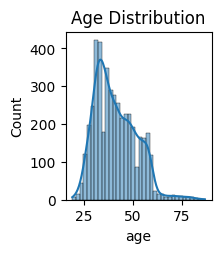

In [8]:
# 1. 나이 분포 시각화
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

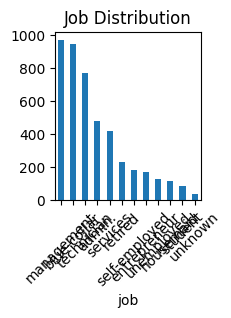

In [9]:
# 2. 직업별 분포
plt.subplot(2, 3, 2)
df['job'].value_counts().plot(kind='bar')
plt.title('Job Distribution')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Education Distribution')

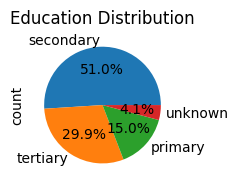

In [10]:
# 3. 학력별 분포
plt.subplot(2, 3, 3)
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')

Text(0.5, 1.0, 'Marital Status Distribution')

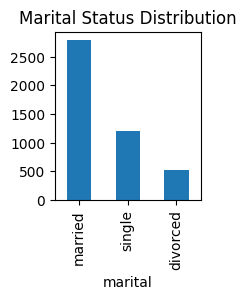

In [11]:
# 4. 결혼 상태별 분포
plt.subplot(2, 3, 4)
df['marital'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')

Text(0.5, 1.0, 'Loan vs Housing Loan')

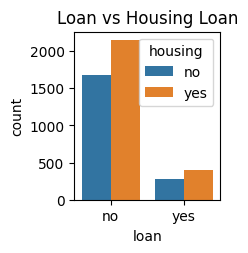

In [12]:
# 5. 대출 여부와 주택 대출 여부의 관계
plt.subplot(2, 3, 5)
sns.countplot(x='loan', hue='housing', data=df)
plt.title('Loan vs Housing Loan')

Text(0.5, 1.0, 'Target Variable Distribution')

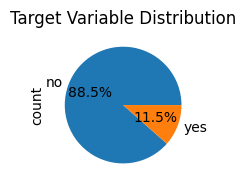

In [13]:
# 6. 목표 변수(y) 분포
plt.subplot(2, 3, 6)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Target Variable Distribution')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# 데이터 전처리
# 범주형 변수를 원핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
df_encoded = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [17]:
# 연속형 변수를 표준화
scaler = StandardScaler()
num_cols = ['age', 'balance', 'duration']
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

In [18]:
# 데이터 분할
X = pd.concat([df_encoded, df_scaled], axis=1)
y = df['y'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# 하이퍼파라미터 튜닝을 위한 그리드 서치
# 로지스틱 회귀
log_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
log_grid = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), log_params, cv=5, scoring='roc_auc')
log_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [20]:
# 의사결정 트리
dt_params = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [21]:
# 랜덤 포레스트
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [22]:
# 최적의 모델로 예측
y_pred_log = log_grid.predict(X_test)
y_pred_dt = dt_grid.predict(X_test)
y_pred_rf = rf_grid.predict(X_test)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1006
           1       0.55      0.23      0.33       125

    accuracy                           0.89      1131
   macro avg       0.73      0.60      0.63      1131
weighted avg       0.87      0.89      0.87      1131

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.8751

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.54      0.28      0.37       125

    accuracy                           0.89      1131
   macro avg       0.73      0.63      0.66      1131
weighted avg       0.87      0.89      0.88      1131

Best parameters: {'max_depth': 5, 'min_samples_split': 10}
Best score: 0.8044

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      

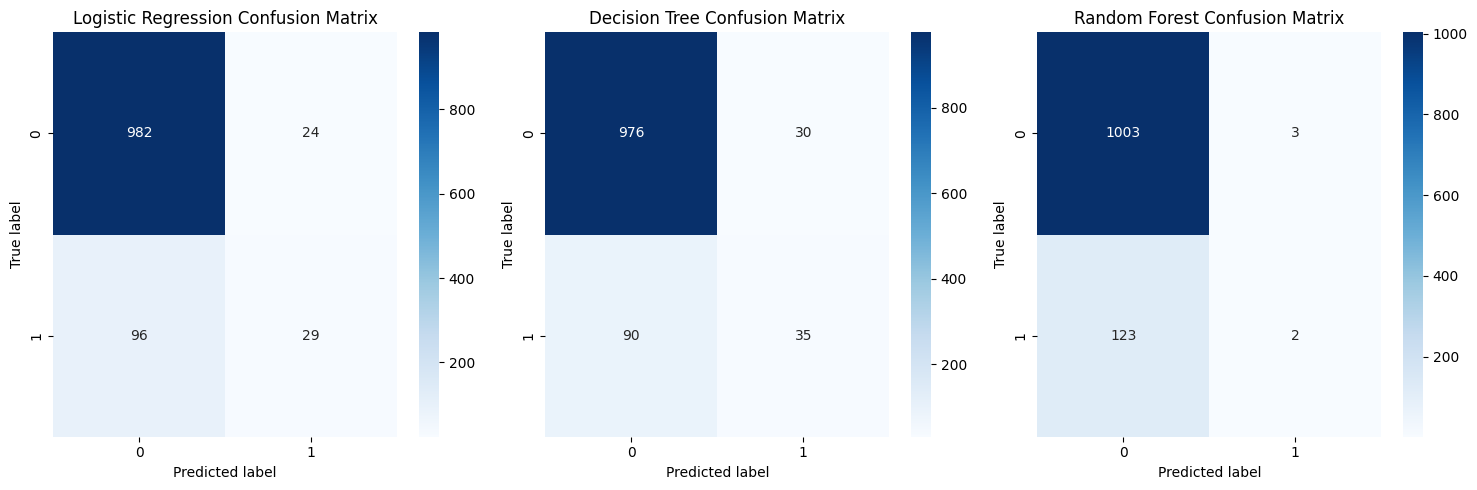

In [24]:
# 성능 평가 및 시각화
models = [('Logistic Regression', log_grid, y_pred_log),
          ('Decision Tree', dt_grid, y_pred_dt),
          ('Random Forest', rf_grid, y_pred_rf)]

plt.figure(figsize=(15, 5))

for i, (name, model, y_pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"Best parameters: {model.best_params_}")
    print(f"Best score: {model.best_score_:.4f}")

plt.tight_layout()
plt.show()


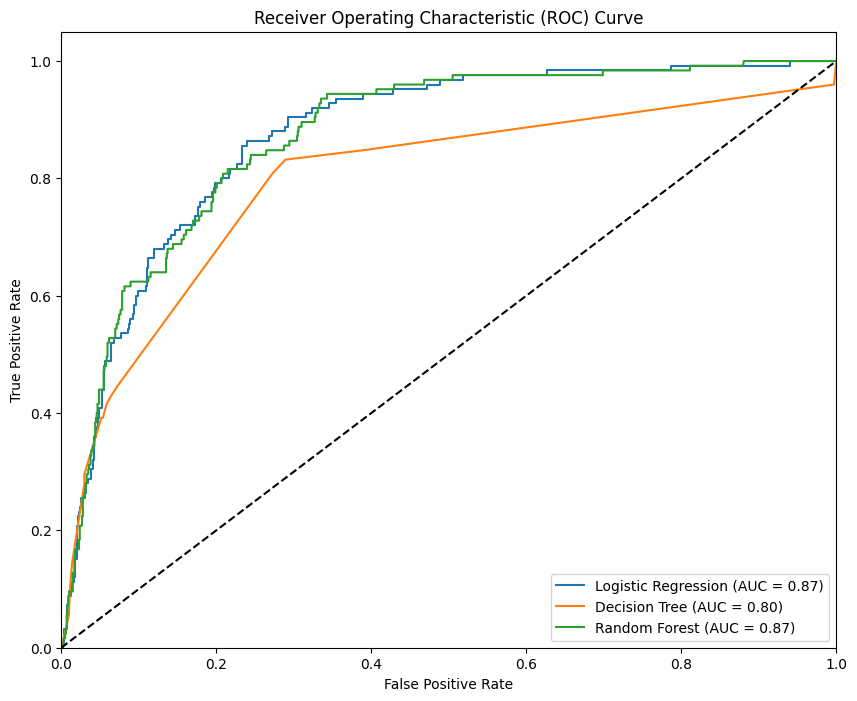

In [25]:
# ROC 곡선
plt.figure(figsize=(10, 8))

for name, model, _ in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


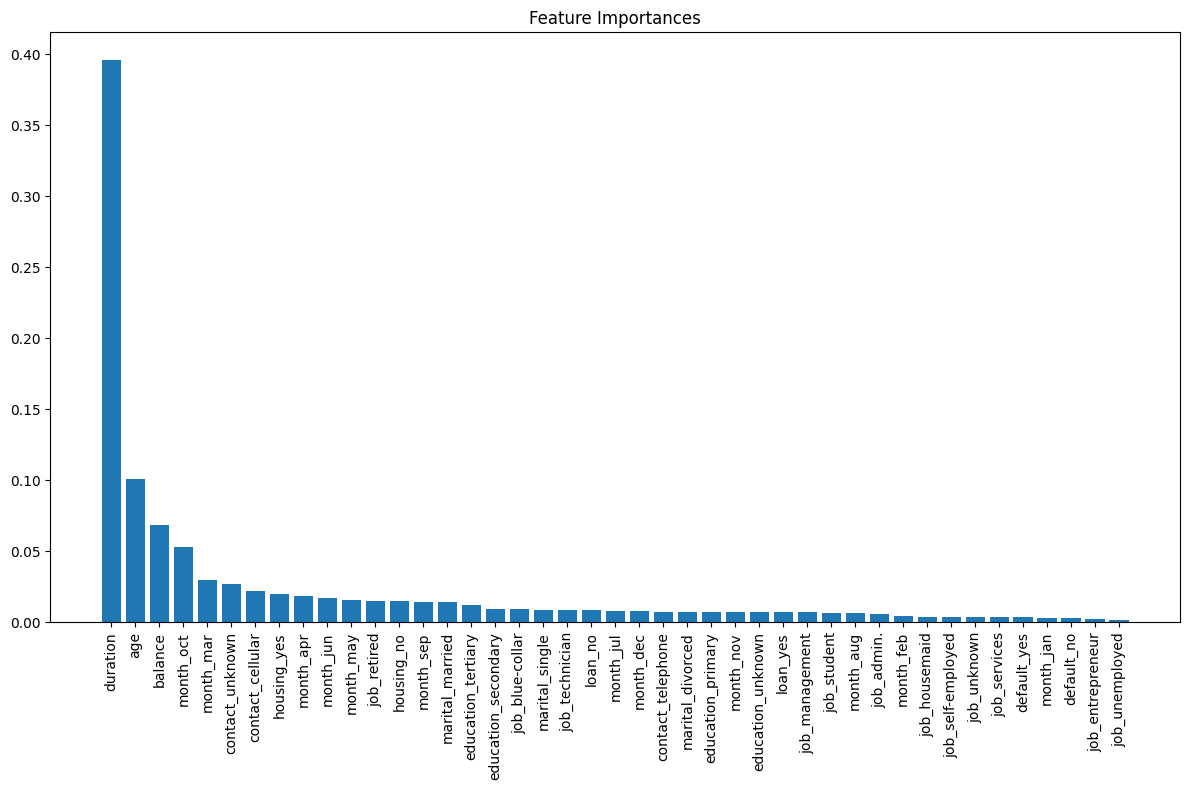

In [26]:
# 특성 중요도 (랜덤 포레스트)
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()